In [1]:
# Create visualizations using Matplotib, Seaborn and Folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
# Importing Data

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [7]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [8]:
# TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [9]:
df_new=df.groupby('Year')['Automobile_Sales'].mean()
df_new

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

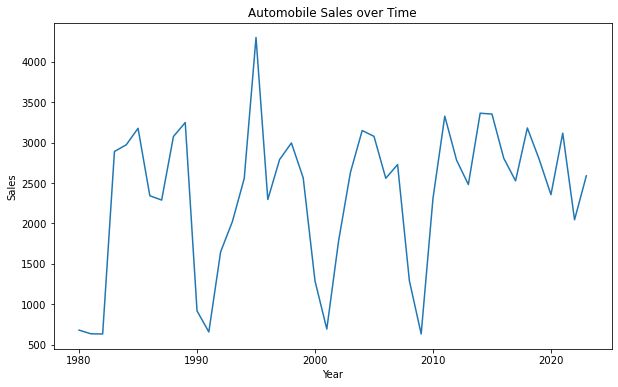

In [10]:
plt.figure(figsize=(10, 6))
df_new.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile Sales over Time')
plt.show()

In [11]:
years= list(range(1980,2024))

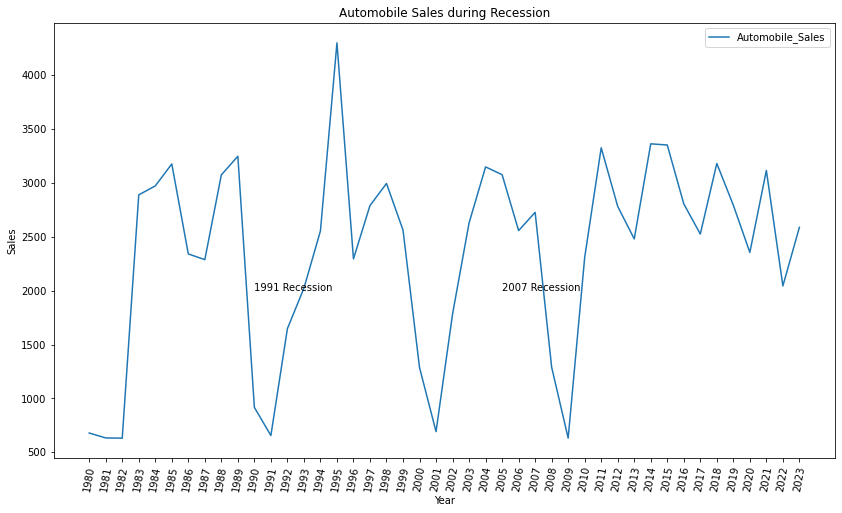

In [12]:
plt.figure(figsize=(14, 8))
df_new.plot(kind='line')
plt.xticks(years, rotation=80)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile Sales during Recession')
plt.text(2005, 2000, '2007 Recession')
plt.text(1990, 2000, '1991 Recession')
plt.legend()
plt.show()

In [13]:
# TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question. 

# Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [14]:
df_new = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_new

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,2882.5
1,1980,Smallfamiliycar,2085.7
2,1980,Supperminicar,3179.2
3,1981,Mediumfamilycar,1885.2
4,1981,Smallfamiliycar,3192.1
...,...,...,...
182,2022,Sports,4596.5
183,2023,Executivecar,1579.6
184,2023,Smallfamiliycar,10658.5
185,2023,Sports,12401.0


In [15]:
df_new.set_index('Year', inplace=True)
df_new.head()

,Vehicle_Type,Automobile_Sales
Year,,
1980,Mediumfamilycar,2882.5
1980,Smallfamiliycar,2085.7
1980,Supperminicar,3179.2
1981,Mediumfamilycar,1885.2
1981,Smallfamiliycar,3192.1


In [16]:
df_new = df_new.groupby(['Vehicle_Type'])['Automobile_Sales']
df_new.head()

Year
1980     2882.5
1980     2085.7
1980     3179.2
1981     1885.2
1981     3192.1
1981     2523.6
1982     5062.9
1982     2408.9
1982      102.0
1983     4120.2
1983    12845.6
1983     5030.6
1983     7998.7
1983     4677.1
1984     6261.6
1984    12299.7
1984     6175.8
1984     2514.0
1984     8415.9
1985    10892.0
1985     7068.4
1986     3163.0
1986     8740.0
1986     4178.5
1987     6676.0
Name: Automobile_Sales, dtype: float64

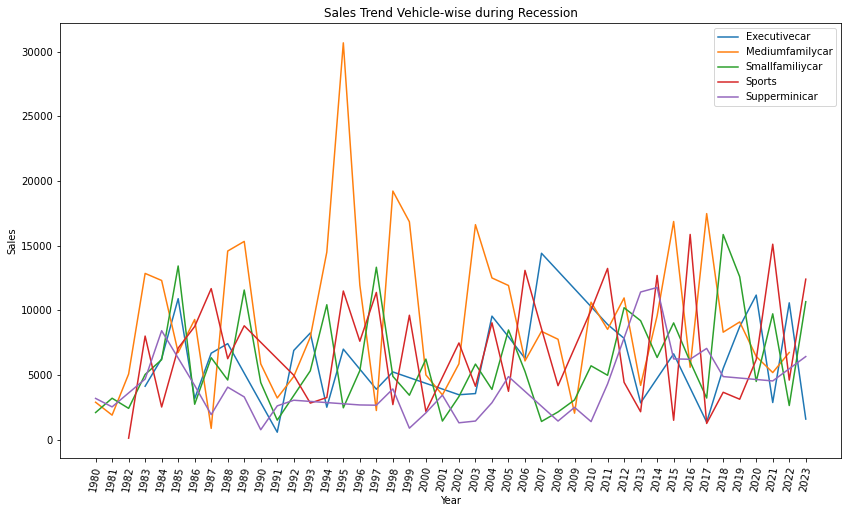

In [17]:
plt.figure(figsize=(14, 8))
df_new.plot(kind='line')
plt.xticks(years, rotation=80)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

In [18]:
# In recession periods the sales trends differ across different vehicle types. While superminicar and smallfamilycar perform
# relatively well in terms of sales, Sport type vehicles decrease sales because of the high cost of the vehicle. 


In [19]:
# TASK 1.3: Use the functionality of Seaborn Library. 

# Create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [20]:
new_df2 = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df2

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


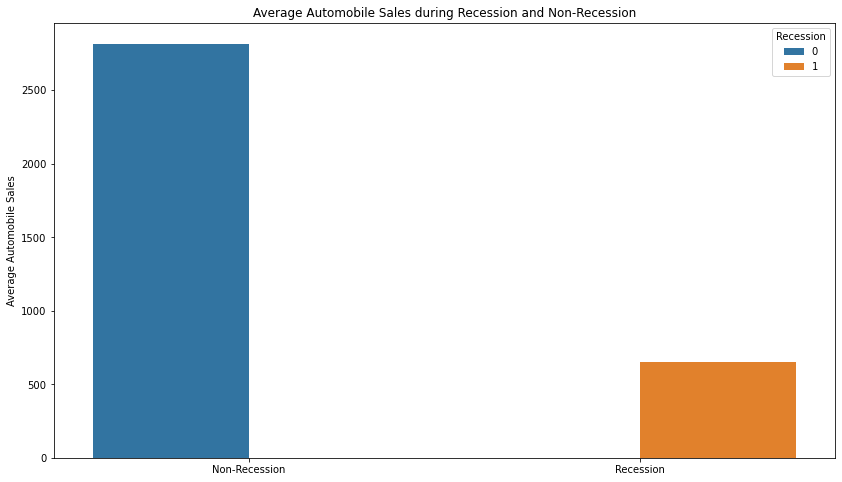

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(data=new_df2, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xlabel('')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

In [22]:
# Compare the sales of different vehicle types during a recession and a non-recession period

In [23]:
new_df3 = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
new_df3

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


In [24]:
# We need only the recession periods (that is, Recession = 1)
recession_data = df[df['Recession'] == 1]
recession_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


In [25]:
# We need only the non-recession periods (that is, Recession = 0)
non_recession_data= df[df['Recession'] == 0]
non_recession_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [26]:
# Calculate the total sales volume by vehicle type during recessions

sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
sales_by_vehicle_type

,Vehicle_Type,Automobile_Sales
0,Executivecar,564.0
1,Mediumfamilycar,28343.6
2,Smallfamiliycar,23426.4
3,Sports,511.0
4,Supperminicar,20437.4


In [27]:
# Calculate the total sales volume by vehicle type during non-recessions
sales_by_vehicle_type2 = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
sales_by_vehicle_type2

,Vehicle_Type,Automobile_Sales
0,Executivecar,185364.10
1,Mediumfamilycar,369706.24
2,Smallfamiliycar,236728.60
3,Sports,264867.90
4,Supperminicar,112285.90


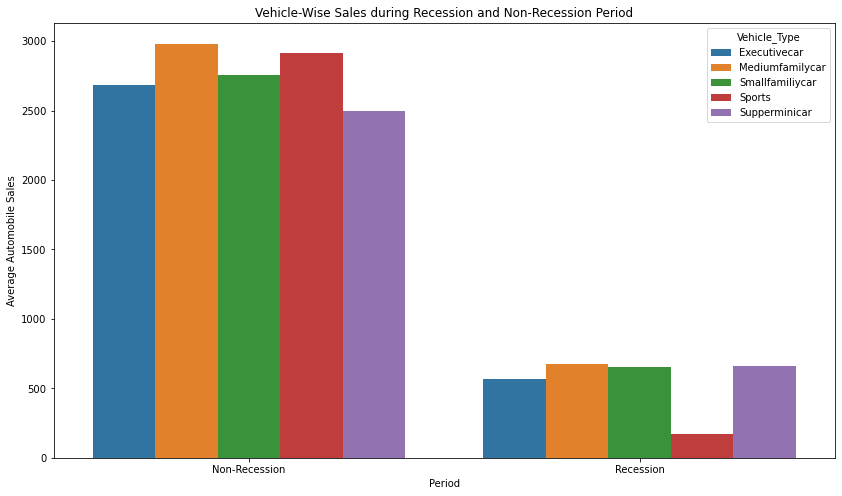

In [28]:
# Create the grouped bar chart using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=new_df3)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

In [29]:
# Generalized decline in overall vehicle sales during recessions. Sports and Executive Car are the most affected vehicle types.

In [30]:
# TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period. 

# Develop line plots for each period.

In [31]:
recession_data = df[df['Recession'] == 1]
non_recession_data= df[df['Recession'] == 0]

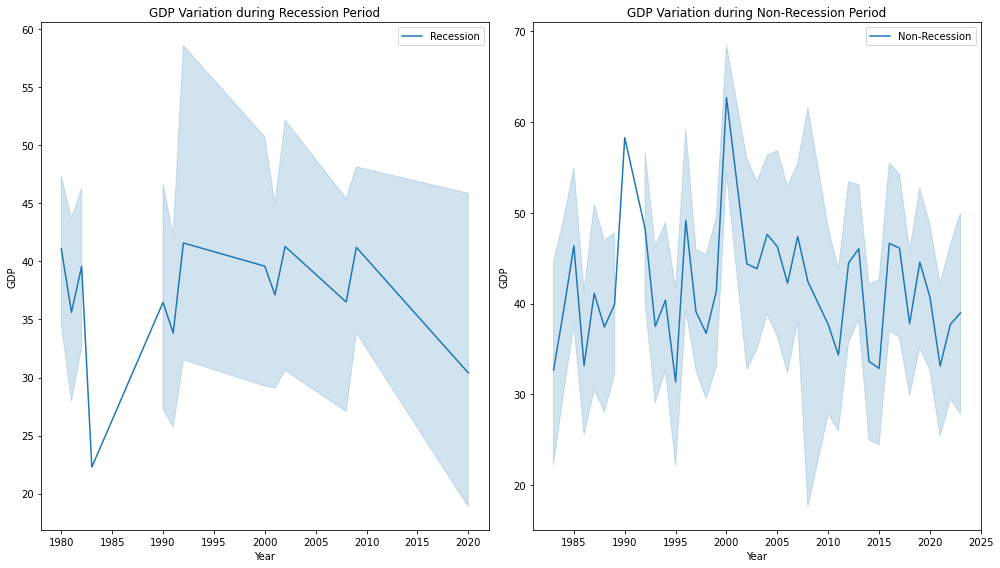

In [32]:
fig=plt.figure(figsize=(14, 8))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1
sns.lineplot(x='Year', y='GDP', data=recession_data, label='Recession',ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2
sns.lineplot(x='Year', y='GDP', data=non_recession_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

In [33]:
# During recessions, we observe a lower level of GDP. This could be a possible explanation of the generalized decrease in sales.

In [34]:
# TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [35]:
size=non_recession_data['Seasonality_Weight']

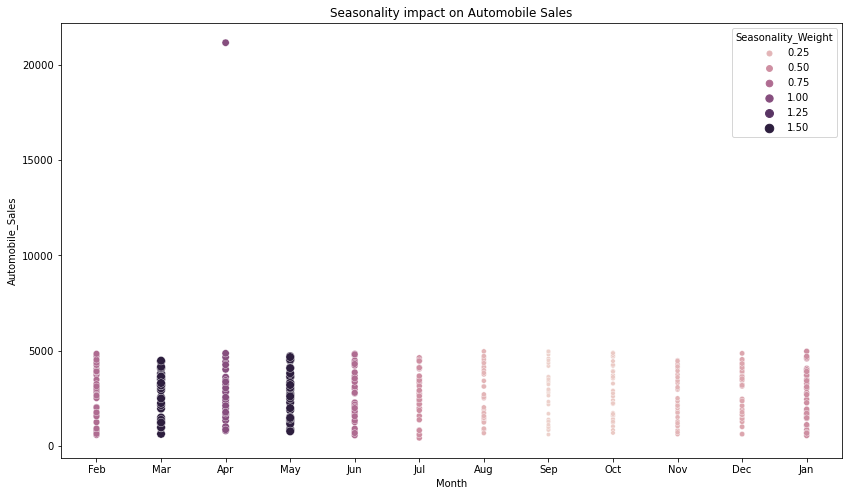

In [36]:
fig=plt.figure(figsize=(14, 8))
sns.scatterplot(data=non_recession_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=True)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

In [37]:
# Seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

In [38]:
# TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle 
#           price relate to the sales volume during recessions.


# From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales 
# during recession period? 

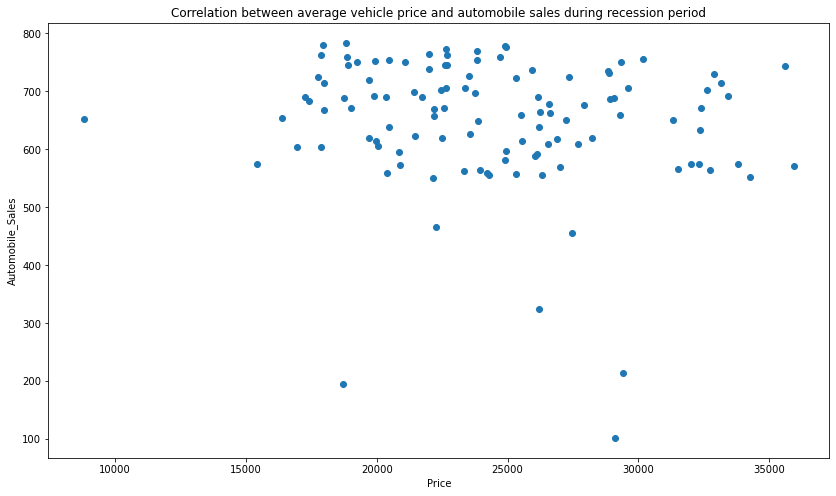

In [39]:
fig=plt.figure(figsize=(14, 8))
recession_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Correlation between average vehicle price and automobile sales during recession period')
plt.show()

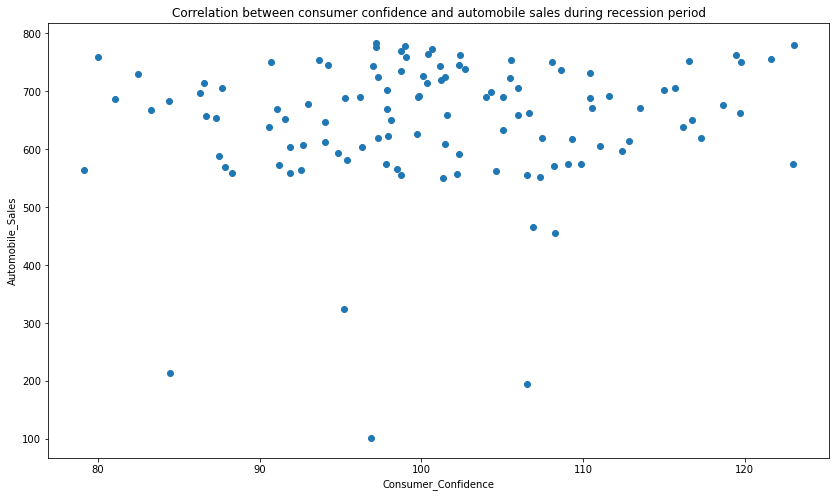

In [40]:
fig=plt.figure(figsize=(14, 8))
recession_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Correlation between consumer confidence and automobile sales during recession period')
plt.show()

In [41]:
# There is not much relation!

In [42]:
# TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives 
# during recession and non-recession periods.

In [43]:
recession_data = df[df['Recession'] == 1]
non_recession_data= df[df['Recession'] == 0]

In [44]:
# Total Advertising expenditure for Recessions and Non-Recession periods
TAd_r = recession_data['Advertising_Expenditure'].sum()
TAd_Nr = non_recession_data['Advertising_Expenditure'].sum()

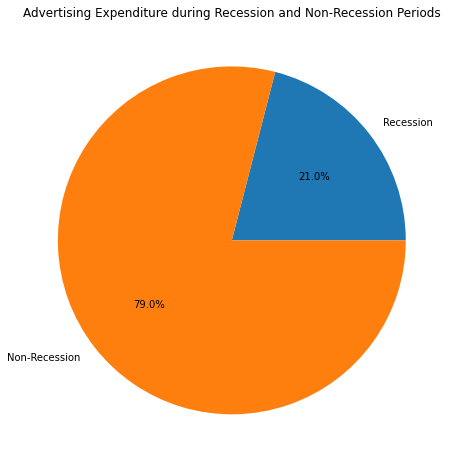

In [45]:
fig=plt.figure(figsize=(14, 8))
plt.pie([TAd_r, TAd_Nr], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%')
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


In [46]:
# Advertisements during non-recession periods exceeds by far advertisements during recession times.

In [47]:
# TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

# Can we observe the share of each vehicle type in total sales during recessions? 

# Create another pie plot to display the total advertisement expenditure for each vehicle type

In [48]:
recession_data = df[df['Recession'] == 1]

In [49]:
# Total Ad Expenditure per Vehicle Type during Recessions
TAvr = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
TAvr

Vehicle_Type
Executivecar         3243
Mediumfamilycar    130612
Smallfamiliycar    102759
Sports              12568
Supperminicar       90728
Name: Advertising_Expenditure, dtype: int64

In [50]:
TAvr.index

Index(['Executivecar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Supperminicar'],
      dtype='object', name='Vehicle_Type')

In [51]:
TAvr.values

array([  3243, 130612, 102759,  12568,  90728], dtype=int64)

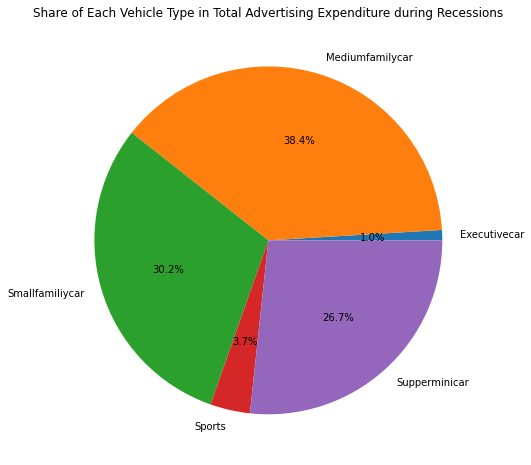

In [52]:
fig=plt.figure(figsize=(14, 8))
labels = TAvr.index
sizes = TAvr.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Share of Each Vehicle Type in Total Advertising Expenditure during Recessions')

plt.show()

In [53]:
# In recession periods, the advertisement expenditure is highly concentrated in relatively low-price vehicles. 
# Sports and Executive Cars (High-Price) have relatively low advertisement expenditure.

In [54]:
# Total Sales per Vehicle Type during Recessions
TSvr = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum()
TSvr

Vehicle_Type
Executivecar         564.0
Mediumfamilycar    28343.6
Smallfamiliycar    23426.4
Sports               511.0
Supperminicar      20437.4
Name: Automobile_Sales, dtype: float64

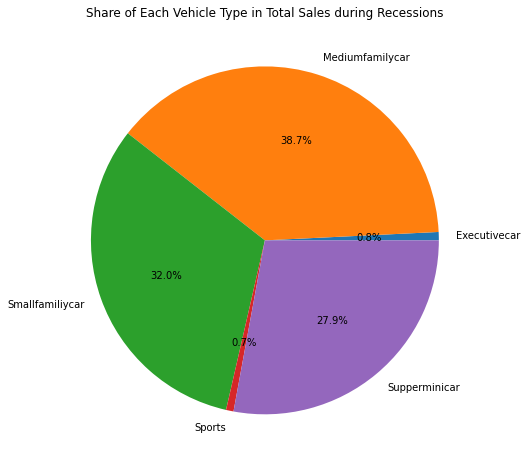

In [55]:
fig=plt.figure(figsize=(14, 8))
labels = TSvr.index
sizes = TSvr.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

In [56]:
# Look at this! In terms of sales during recessions, the distribution is very similar to what we obtained in terms of Adds.

In [57]:
# TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales 
#            during the Recession Period.

In [58]:
recession_data = df[df['Recession'] == 1]

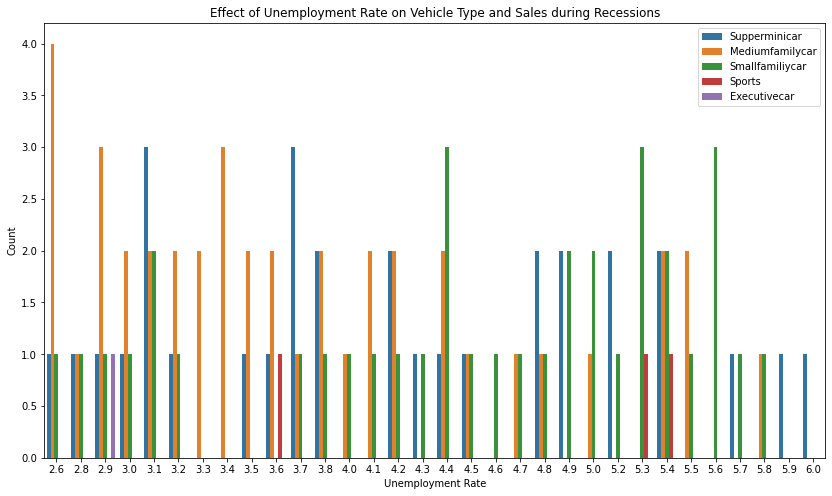

In [59]:
fig=plt.figure(figsize=(14, 8))
sns.countplot(data=recession_data, x='unemployment_rate', hue='Vehicle_Type')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recessions')
plt.legend(loc='upper right')
plt.show()

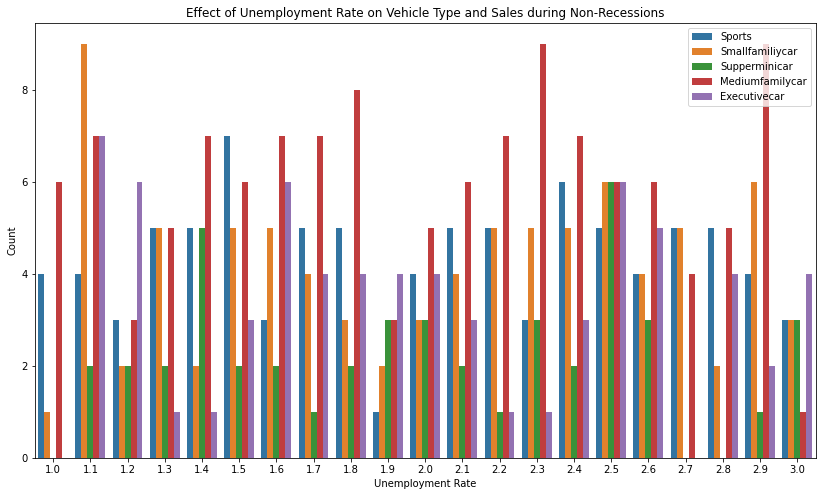

In [60]:
fig=plt.figure(figsize=(14, 8))
sns.countplot(data=non_recession_data, x='unemployment_rate', hue='Vehicle_Type')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Non-Recessions')
plt.legend(loc='upper right')
plt.show()

In [61]:
# If we compare the effect of unemployment (recession measure) on vehicle type and sales, we can observe that even sales

# decrease for all types of vehicles when the recession comes, the low-range ones are more robust and suffers less than 

# the high-range in terms of sales. 

In [62]:
# OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period